1. 아날로그인 현실 세계에서 디지털 이미지를 얻기 위해서는 표본화와 양자화의 두 단계의 과정이 필요하다. 두 과정에 대해 설명하시오.

2. 다음은 print(a)의 출력이다. numpy의 full() 함수를 사용하여 a를 만드는 문장을 쓰시오.<br>
[[128. 128. 128. 128.]<br>
 [128. 128. 128. 128.]<br>
 [128. 128. 128. 128.]]<br>
A: a = numpy.full((3,4), 128, numpy.float64)

3. 마우스 콜백함수를 이요하여 키보드의 컨트롤 키와 마우스 왼쪽 버튼을 동시에 누를 때마다 그 위치에 반지름 30짜리 빨간색 원을 출력하는 이벤트 처리 함수를 작성하시오.

4. 실행결과를 쓰시오.<br>
a = np.arange(12)<br>
print(a[a>5].reshape(2,-1))

5. CMY 컬러모델에 대해 설명하시오.

6. 히스토그램 그래프로 알 수 있는 영상의 특징들을 설명하시오.<br>
왼쪽으로 치우쳐져 있음 -> 이미지가 어두움<br>
폭이 좁음 -> 이미지가 흐릿함

7. 이진화 알고리즘 중 오츠 알고리즘과 적응형 이진화 알고리즘을 간략히 설명하고, 특징을 비교 설명하시오.

8. 아래 왼쪽 이미지는 컬러 이미지를 그레이스케일로 읽은 것이다. 오른쪽 이미지는 이것을 이진화한 것이다. 아래와 같이 출력하는 전체 프로그램을 작성하되, 이진화는 numpy의 펜시인덱싱을 사용하시오. 임계값은 127이고, 이미지 파일은 matplot.jpg이다.<br>
img2[img2>=127]: 255<br>
img2[img2<127}]: 0

9. 아래 두 이미지를 가지고 다음과 같은 프로그램을 실행시켰을 때, ...<br>
import numpy as np<br>
image1 = cv2.imread("abs_test1.jpg", cv2.IMREAD_GRAYSCALE)<br>
image2 = cv2.imread("abs_test2.jpg", cv2.IMREAD_GRAYSCALE)<br>
dif_img = np.substract(image1, image2)<br>
cv2.imshow('dif_img', dif_img)<br>

In [5]:
import numpy as np, cv2

def draw_histo(hist, shape=(200, 256)):
    hist_img = np.full(shape, 255, np.uint8)
    cv2.normalize(hist, hist, 0, shape[0], cv2.NORM_MINMAX) # MINMAX, L1, L2, INF
    gap=hist_img.shape[1]/hist.shape[0]

    for i, h in enumerate(hist):
        x=int(round(i*gap))
        w=int(round(gap))
        cv2.rectangle(hist_img, (x, 0, w, int(h)), 0, cv2.FILLED)
    return cv2.flip(hist_img, 0)

def search_value_idx(hist, bias=0):
    for i in range(hist.shape[0]):
        idx = np.abs(bias - i)
        if hist[idx] > 0:
            return idx
    return -1

image = cv2.imread("images/hist_stretch.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Expection("영상 파일 읽기 오류")

bsize, ranges = [64], [0,256]
hist = cv2.calcHist([image], [0], None, bsize, ranges)

bin_width = ranges[1]/bsize[0]
low = search_value_idx(hist, 0) * bin_width
high = search_value_idx(hist, bsize[0] - 1) * bin_width

idx = np.arange(0,256)
idx = (idx - low)/(high-low) * 255
idx[0:int(low)] = 0
idx[int(high+1):] = 255

dst = cv2.LUT(image, idx.astype('uint8'))
dst2 = cv2.normalize(image, None, 0, 256, cv2.NORM_MINMAX)

hist_dst = cv2.calcHist([dst], [0], None, bsize, ranges)
hist_dst2 = cv2.calcHist([dst2], [0], None, bsize, ranges)
hist_img = draw_histo(hist, (200, 360))
hist_dst_img = draw_histo(hist_dst, (200, 360))
hist_dst2_img = draw_histo(hist_dst2, (200, 360))

print("high_value =", high)
print("low_value =", low)
cv2.imshow("image", image)
cv2.imshow("hist_img", hist_img)
cv2.imshow("dst", dst)
cv2.imshow("hist_dst_img", hist_dst_img)
cv2.imshow("dst2", dst)
cv2.imshow("hist_dst2_img", hist_dst_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\legna\AppData\Local\Temp\ipykernel_25000\2461066982.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cv2.rectangle(hist_img, (x, 0, w, int(h)), 0, cv2.FILLED)


high_value = 180.0
low_value = 52.0


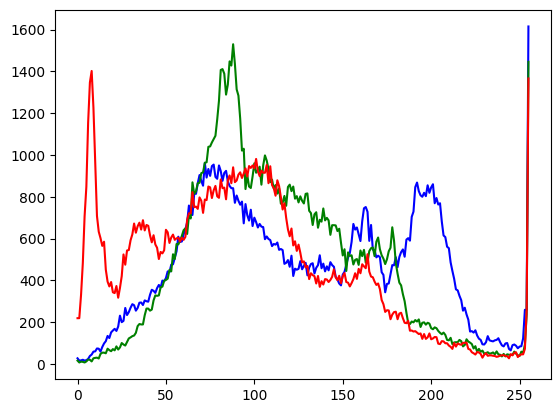

In [2]:
# 추가: 컬러 히스토그램을 출력하는 다른 방법
import numpy as np, cv2
import matplotlib.pyplot as plt

image = cv2.imread("images/hue_hist.jpg", cv2.IMREAD_COLOR)
if image is None: raise Expection("영상 파일 읽기 오류")

b,g,r = cv2.split(image)

hist_b = cv2.calcHist([b], [0], None, [256], [0,256])
plt.plot(hist_b, color='b')
hist_g = cv2.calcHist([g], [0], None, [256], [0,256])
plt.plot(hist_g, color='g')
hist_r = cv2.calcHist([r], [0], None, [256], [0,256])
plt.plot(hist_r, color='r')
plt.show()

cv2.imshow("image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

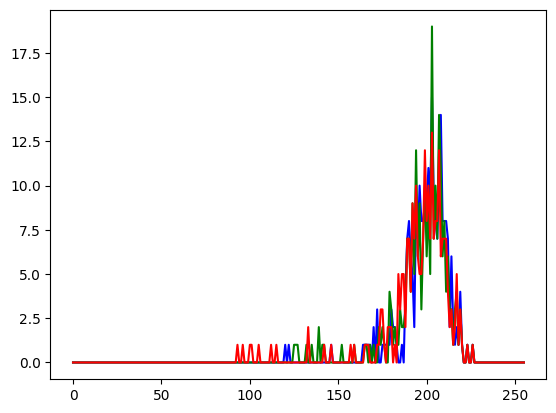

In [2]:
# 추가: 원하는 영역의 컬러 히스토그램 출력
import numpy as np, cv2
import matplotlib.pyplot as plt

image = cv2.imread("images/hue_hist.jpg", cv2.IMREAD_COLOR)
if image is None: raise Expection("영상 파일 읽기 오류")

while True:
    x,y,w,h = cv2.selectROI('img', image, False)

    if w and h:
        roi = image[y:y+h, x:x+w]

    hist_b = cv2.calcHist([roi], [0], None, [256], [0,256])
    plt.plot(hist_b, color='b')
    hist_g = cv2.calcHist([roi], [1], None, [256], [0,256])
    plt.plot(hist_g, color='g')
    hist_r = cv2.calcHist([roi], [2], None, [256], [0,256])
    plt.plot(hist_r, color='r')
    plt.show()

    if cv2.waitKey(0) == 27:
        break

cv2.waitKey(0)
cv2.destroyAllWindows()

- 교재의 hue_histogram.py 방식의 컬러 히스토그램을 마우스로 roi를 선택한 구간에 대해서 보여주려면?

In [3]:
import numpy as np, cv2

def make_palette(rows):
    hue = [round(i*180/rows) for i in range(rows)] # hue 값 리스트 갱신
    hsv = [[[h, 255, 255]] for h in hue]           # (hue, 255, 255) 화소값 계산
    hsv = np.array(hsv, np.uint8)                  # numpy 행렬의 uint8형 변환
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)    # HSV 컬러 -> BGR 컬러

def draw_hist_hue(hist, shape=(200,256,3)):
    hsv_palette = make_palette(hist.shape[0])      # 색상 팔레트 생성
    hist_img = np.full(shape, 255, np.uint8)
    cv2.normalize(hist, hist, 0, shape[0], cv2.NORM_MINMAX)     # 정규화

    gap = hist_img.shape[1] / hist.shape[0] # 한 계급 크기
    for i, h in enumerate(hist):
        x, w = int(round(i*gap)), int(round(gap))
        color=tuple(map(int, hsv_palette[i][0]))   # 정수형 튜플로 변환
        cv2.rectangle(hist_img, (x,0,w,int(h)), color, cv2.FILLED) # 팔레트 색으로 그리기
    return cv2.flip(hist_img, 0)

image = cv2.imread("images/hue_hist.jpg", cv2.IMREAD_COLOR)        # 영상 읽기
if image is None: raise Exception("영상 파일 읽기 오류")

hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # BGR 컬러 -> HSV 컬러
hue_hist = cv2.calcHist([hsv_img], [0], None, [18], [0,180])  # HUE 채널 히스토그램 계산
hue_hist_img = draw_hist_hue(hue_hist, (200, 360, 3))  # 히스토그램 그래프

cv2.imshow("image", image)
cv2.imshow("hue_hist_img", hue_hist_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\legna\AppData\Local\Temp\ipykernel_12160\3189078365.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cv2.rectangle(hist_img, (x,0,w,int(h)), color, cv2.FILLED) # 팔레트 색으로 그리기


## 기말 프로젝트
- 큰 주제: 콜라주(여러가지 이미지를 가지고 한 장의 이미지를 만듦)
- 나머지는 알아서
- 수많은 영상처리 기술들을 적절히 사용해야 좋은 점수를 받을 수 있음
- 컴퓨터 비전(ex. AI)의 요소가 들어간다 해도 점수 반영은 안함
- 적절한 영상처리 기술과 적절한 컴퓨터 비전 및 AI 요소들을 넣어야 함 -> 완성도는 올라감
- 초기 계획을 잘 구성해야 함
- 얼마나 아이디어가 참신한가?(참신)
- 얼마나 잘 완성을 했는가?(완성도)

- --------------------------------------------------------------------------------------------------------
- 제안서(pdf): 제목, 왜 만들게 되었는데, 어떤 내용인지(그림 첨부), 어떤 결과를 만들건지
- 중간 결과(보고서)를 팀즈에 올림: 이것을 중간 평가 점수에 반영<br> -> 제출(pdf): 계획이 이랬고, 메인 소스코드와 어디까지 진행이 되었는지를 나타내야 함(스케쥴) 11/23까지 제출
- 기말 기간 전 2주 동안 발표(2팀 나눠서) 12/3, 12/10
- 최종: 제안서의 내용과 비슷하지만 결과에 대한 내용의 서술이 길어질것, 보고서 + 소스코드 + PPT
- 10/26에 3일과 10일 중 언제 발표할지 결정

### 히스토그램 스트레칭
- 히스토그램의 분포가 좁아서 영상의 대비가 좋지 않은 영상
  - ex. 해변에서 사진을 찍을 때 shrinking을 사용하면 좋음
- low value와 high value를 확인한 후 히스토그램의 폭을 0~255으로 늘림
  - min, max를 찾고 0, 255로 바꾼 후 중간값 x 비율 처리함
- normalize를 통해 값을 0~255로 설정해 히스토그램의 폭을 쫙 늘릴 수 있게 됨

### 히스토그램 평활화(EQ: equlizer)
- 화소값의 분포를 나타내는 히스토그램이 균일하게 되도록 변환하는 처리
- 히스토그램 평활화의 사전적 의미인 분포의 균등이라는 방법을 이용해 명암 대비 증가
- 인간의 눈은 영상의 밝기보다 대비가 증가할 때 인지도 향상
- 영상의 인지도를 높이고, 영상의 화질 개선

- 픽셀 분포가 튀어나오는 것 없이 평평하게 만듦

### 평활화 알고리즘
1. 영상의 히스토그램을 계산
2. 히스토그램 빈도값에서 누적 빈도수(누적합)를 계산
3. 누적 빈도수를 정규화(정규화 누적합)함
4. 결과 화소값 = 정규화 누적합 x 최대 화소값

- 큰 값은 폭이 크고 작은 값은 폭이 작음

In [10]:
# 6-12 히스토그램 평활화
import numpy as np, cv2

def make_palette(rows):
    hue = [round(i*180/rows) for i in range(rows)] # hue 값 리스트 갱신
    hsv = [[[h, 255, 255]] for h in hue]           # (hue, 255, 255) 화소값 계산
    hsv = np.array(hsv, np.uint8)                  # numpy 행렬의 uint8형 변환
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)    # HSV 컬러 -> BGR 컬러

def draw_hist_hue(hist, shape=(200,256,3)):
    hsv_palette = make_palette(hist.shape[0])      # 색상 팔레트 생성
    hist_img = np.full(shape, 255, np.uint8)
    cv2.normalize(hist, hist, 0, shape[0], cv2.NORM_MINMAX)     # 정규화

    gap = hist_img.shape[1] / hist.shape[0] # 한 계급 크기
    for i, h in enumerate(hist):
        x, w = int(round(i*gap)), int(round(gap))
        color=tuple(map(int, hsv_palette[i][0]))   # 정수형 튜플로 변환
        cv2.rectangle(hist_img, (x,0,w,int(h)), color, cv2.FILLED) # 팔레트 색으로 그리기
    return cv2.flip(hist_img, 0)

image = cv2.imread("images/equalize.jpg", cv2.IMREAD_GRAYSCALE)        # 영상 읽기
if image is None: raise Exception("영상 파일 읽기 오류")

bins, ranges = [256], [0, 256]
hist = cv2.calcHist([image], [0], None, bins, ranges)

accum_hist = np.zeros(hist.shape[:2], np.float32)
accum_hist[0] = hist[0]
for i in range(1, hist.shape[0]):
    accum_hist[i] = accum_hist[i - 1] + hist[i]

accum_hist = (accum_hist / sum(hist)) * 255
dst1 = [[accum_hist[val] for val in row] for row in image]
dst1 = np.array(dst1, np.uint8)

dst2 = cv2.equalizeHist(image)

hist1 = cv2.calcHist([dst1], [0], None, bins, ranges)
hist2 = cv2.calcHist([dst2], [0], None, bins, ranges)
hist_img = draw_hist_hue(hist)
hist_img1 = draw_hist_hue(hist1)
hist_img2 = draw_hist_hue(hist2)

cv2.imshow("image", image)
cv2.imshow("hist_img", hist_img)
cv2.imshow("dst1_User", dst1)
cv2.imshow("User_hist", hist_img1)
cv2.imshow("dst2_OpenCV", dst2)
cv2.imshow("OpenCV_hist", hist_img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\legna\AppData\Local\Temp\ipykernel_12160\909238938.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cv2.rectangle(hist_img, (x,0,w,int(h)), color, cv2.FILLED) # 팔레트 색으로 그리기


### CMY(K) 컬러 공간

In [3]:
# 6-13
# CMY_img = white - BGR_img[:,:,::-1]
# titles = ['BGR_img', 'CMY_img', ' Cyan', 'Magenta', 'Yellow']

import numpy as np, cv2
BGR_img = cv2.imread("images/color_model.jpg", cv2.IMREAD_COLOR)
if BGR_img is None: raise Exception("영상파일 읽기 오류")

white = np.array([255, 255, 255], np.uint8)
CMY_img = white - BGR_img[:, :, ::-1]
Cyan, Magenta, Yellow = cv2.split(CMY_img)

titles = ['BGR_img', 'CMY_img', 'Cyan', 'Magenta', 'Yellow']
[cv2.imshow(t, eval(t)) for t in titles]
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# 6-14

import numpy as np, cv2
BGR_img = cv2.imread("images/color_model.jpg", cv2.IMREAD_COLOR)
if BGR_img is None: raise Exception("영상 파일 읽기 오류")

white = np.array([255,255,255], np.uint8)
CMY_img = white - BGR_img
CMY = cv2.split(CMY_img)

black = cv2.min(CMY[0], cv2.min(CMY[1], CMY[2]))
Yellow, Magenta, Cyan = CMY - black

titles = ['black','Yellow','Magenta','Cyan']
[cv2.imshow(t, eval(t)) for t in titles]
cv2.waitKey(0)
cv2.destroyAllWindows()

- 밝기값을 이용하고 싶을 때 사용
- hue를 통해 hsv로 사용

# 7. 영역 처리

## 영상처리 기법 분류

### domain
- 공간 영역: spatial domain
- 주파수 영역: frequency domain

### 공간 영역
- 화소 기반 처리(pixel based processing)
- 영역 기반 처리(area based processing)
- 기하학적 처리(geomentric processing)

### 7장 내용 $\to$ spatial domain에서의 영역 기반 처리
- 마스크(mask)라는 영역을 기반으로 연산 수행 $\to$ 회신(convolution) $\to$ 필터링(filtering)
  - 커널(kernel), 윈도우(window), 필터(filter)
- 마스크 기반의 엣지(edge) 검출 + 형태학 $\to$ 모폴로지(mopology)